In [2]:
pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [4]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 41.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.3
    Uninstalling typing_extensions-4.6.3:
      Successfully uninstalled typing_extensions-4.6.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
import tensorflow as tf
import keras as ks
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras.utils

In [3]:
mnist = ks.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))

Training data: (60000, 28, 28), (60000,)


In [5]:
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


In [6]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))


There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


In [7]:
plt.figure(figsize = (8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Label: 5')

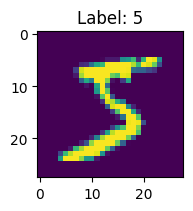

In [8]:
plt.subplot(1, 3, 2)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

Text(0.5, 1.0, 'Label: 0')

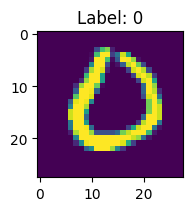

In [9]:
plt.subplot(1, 3, 2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

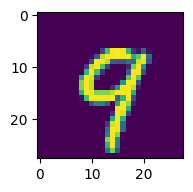

In [10]:
plt.subplot(1, 3, 3)
plt.imshow(test_images[12])

In [11]:
#As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel values ranges from 0 to 255.
#Dividing the data by 255 scales to the required range.

train_images = train_images/255.0
test_images = test_images/255.0

In [12]:
#Splitting the training data to training and validation sets.
X_train = train_images[0:50000]
X_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

In [13]:
print("X_train: {}".format(X_train.shape))

X_train: (50000, 28, 28)


In [14]:
print("X_val: {}".format(X_val.shape))

X_val: (10000, 28, 28)


In [15]:
print("y_train: {}".format(y_train.shape))

y_train: (50000,)


In [16]:
print("y_val: {}".format(y_val.shape))

y_val: (10000,)


In [17]:
#Reshape data from 28*28 array to a single array
new_dimension = np.prod(train_images.shape[1:])
X_train = X_train.reshape(X_train.shape[0], new_dimension)
X_val = X_val.reshape(X_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

In [18]:
print("X_train: {}".format(X_train.shape))

X_train: (50000, 784)


In [19]:
print("X_val: {}".format(X_val.shape))

X_val: (10000, 784)


In [20]:
print("test_images: {}".format(test_images.shape))

test_images: (10000, 784)


In [21]:
#Encoding labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [22]:
#Inputs
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

Instructions for updating:
non-resource variables are not supported in the long term


Building the Model Architecture

In [23]:
#Create a model architecture
def multilayer_perceptron(X, no_classes, first_layer_neurons=256, second_layer_neurons=128):
    # First layer
    first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
    first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
    first_layer_output = tf.nn.relu(tf.add(tf.matmul(X, first_weight), first_bias))

    # Second layer
    second_weight = tf.Variable(tf.random_uniform([first_layer_neurons, second_layer_neurons]))
    second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
    second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))
    # Output layer
    final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
    final_bias = tf.Variable(tf.zeros([no_classes]))
    logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

    return logits

In [24]:
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01

#we define the loss and optimiser for the network

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



**Running the model**

In [25]:
#initialise the variables
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(X_train) // batch_size
#train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size
    for i in range(iteration):
      batch_x, batch_y = X_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size
      #average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))
    #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.9139000177383423


Optimization for training deep neural networks

In [26]:
#Building a Sequential Feed Forward Network in Keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#Build the model object
model = Sequential()
# Build the input and the hidden layers
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
# Build the output layer
model.add(Dense(no_labels, activation='softmax'))

Now that the model is in place, we configure the learning process using .compile(). Here we specify our loss function (or objective function). For our setting categorical cross entropy fits the bill, but in general other loss functions are available.

As for the optimizer of choice we'll use Adam with default settings. We could also instantiate an optimizer and set parameters before passing it to model.compile() but for this example the defaults will do.

We also choose which metrics will be evaluated during training and testing. We can pass any list of metrics - even build metrics ourselves - and have them displayed during training or testing.

In [27]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.categorical_crossentropy, metrics = ['accuracy'])

Having compiled our model we can now start the training process. We have to specify how many times we want to iterate on the whole training set (epochs) and how many samples we use for one update to the model's weights (batch size).

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=1000)

test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 35us/sample - loss: 0.7289 - acc: 0.8089 - val_loss: 0.2615 - val_acc: 0.9261
Epoch 2/20
 1000/50000 [..............................] - ETA: 1s - loss: 0.2870 - acc: 0.9150

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 1s 27us/sample - loss: 0.2401 - acc: 0.9307 - val_loss: 0.1837 - val_acc: 0.9515
Epoch 3/20
50000/50000 [==============================] - 1s 27us/sample - loss: 0.1738 - acc: 0.9497 - val_loss: 0.1525 - val_acc: 0.9579
Epoch 4/20
50000/50000 [==============================] - 1s 27us/sample - loss: 0.1377 - acc: 0.9594 - val_loss: 0.1382 - val_acc: 0.9611
Epoch 5/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.1112 - acc: 0.9678 - val_loss: 0.1132 - val_acc: 0.9671
Epoch 6/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.0920 - acc: 0.9737 - val_loss: 0.1057 - val_acc: 0.9688
Epoch 7/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.0767 - acc: 0.9782 - val_loss: 0.0937 - val_acc: 0.9709
Epoch 8/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.0649 - acc: 0.9818 - val_loss: 0.0939 - val_acc: 0.9712
Epoch 9/20
50000/50000 [==============

Text(0.5, 1.0, 'Loss Curves - before regularisation')

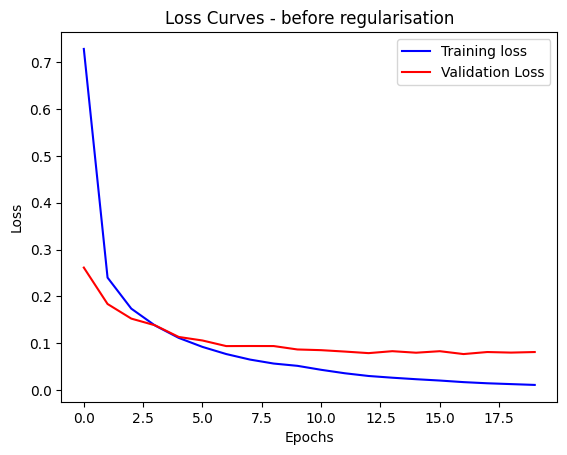

In [29]:
#Check for Overfitting

plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

In [33]:
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))

reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation = 'relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

reg_model.compile(optimizer = 'adam', loss = tf.keras.losses.categorical_focal_crossentropy, metrics = ['accuracy'])

reg_history = reg_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 20, batch_size = 1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49000/50000 [============================>.] - ETA: 0s - loss: 0.1667 - acc: 0.6774

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 2s 38us/sample - loss: 0.1647 - acc: 0.6807 - val_loss: 0.0378 - val_acc: 0.9209
Epoch 2/20
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0542 - acc: 0.8797 - val_loss: 0.0259 - val_acc: 0.9437
Epoch 3/20
50000/50000 [==============================] - 2s 30us/sample - loss: 0.0395 - acc: 0.9094 - val_loss: 0.0206 - val_acc: 0.9538
Epoch 4/20
50000/50000 [==============================] - 2s 30us/sample - loss: 0.0314 - acc: 0.9257 - val_loss: 0.0175 - val_acc: 0.9607
Epoch 5/20
50000/50000 [==============================] - 2s 30us/sample - loss: 0.0273 - acc: 0.9349 - val_loss: 0.0154 - val_acc: 0.9643
Epoch 6/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.0235 - acc: 0.9414 - val_loss: 0.0140 - val_acc: 0.9675
Epoch 7/20
50000/50000 [==============================] - 2s 44us/sample - loss: 0.0213 - acc: 0.9462 - val_loss: 0.0129 - val_acc: 0.9692
Epoch 8/20
50000/50000 [==============

In [34]:
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Test loss: 0.00859541066061647
Test accuracy: 0.9779000282287598


Text(0.5, 1.0, 'Loss Curves - After Regularisation')

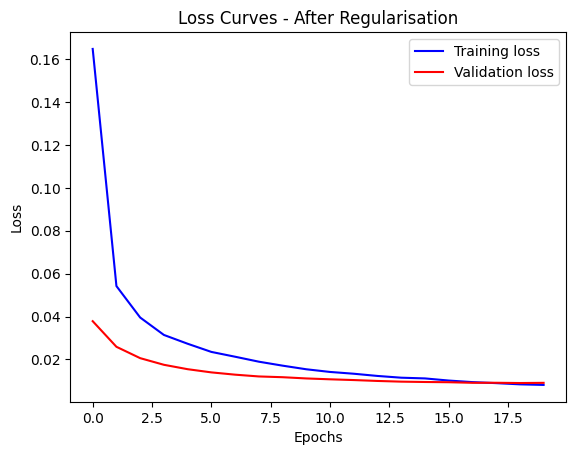

In [37]:
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - After Regularisation')

**Making Predictions**

Let's use our model to predict some images and labels

In [38]:
#Make predictions
predictions = model.predict([test_images])
print(np.argmax(predictions[1000]))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


9


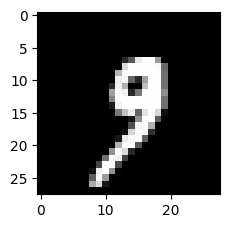

In [39]:
#Now let's see whether the image would turn out to be 9
#Remember that the input data to the network were flattened for the purpose of learning to a vector with a length of 784.
plt.figure(figsize = (8, 5))
plt.subplot(1, 3, 1)
plt.imshow(test_images[1000].reshape(28,28), cmap = 'gray') #Import the image
plt.show() #Show the image

In [40]:
#We can try on several predictions
predictions = model.predict([test_images])
print(np.argmax(predictions[6700]))

4


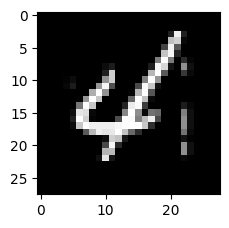

In [41]:
plt.figure(figsize = (8, 5))
plt.subplot(1, 3, 1)
plt.imshow(test_images[6700].reshape(28,28), cmap = 'gray') #Import the image
plt.show()

In [42]:
predictions = model.predict([test_images])
print(np.argmax(predictions[7500]))

8


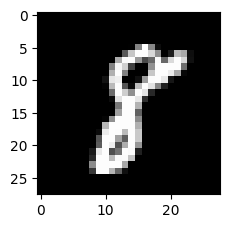

In [44]:
plt.figure(figsize = (8, 5))
plt.subplot(1, 3, 1)
plt.imshow(test_images[7500].reshape(28,28), cmap = 'gray') #Import the image
plt.show()